# Pytorch Computer vision

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## 1. Getting a dataset

FasshionMNIST


In [2]:
from torchvision import datasets
train_dataset = datasets.FashionMNIST(root="data",
                                      train=True,
                                      download=True,
                                      transform=torchvision.transforms.ToTensor(),
                                      target_transform=None)

test_dataset = datasets.FashionMNIST(root="data",
                                     train=False,
                                     download=True,
                                     transform=torchvision.transforms.ToTensor(),
                                     target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 17637712.23it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 334588.90it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5505859.99it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 2239165.92it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [4]:
image, label = train_dataset[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_dataset.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

### 1.2 Visualizing our data

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

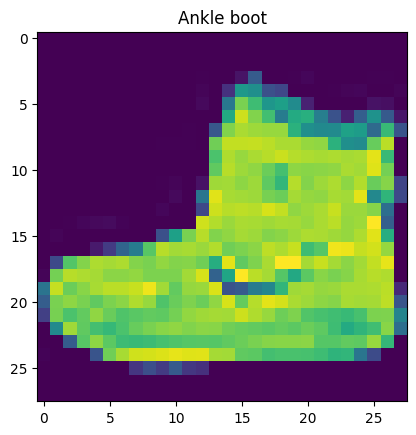

In [8]:
image, label = train_dataset[0]
print(f"image shape: {image.shape}")
plt.imshow(image.reshape(28, 28, 1))
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

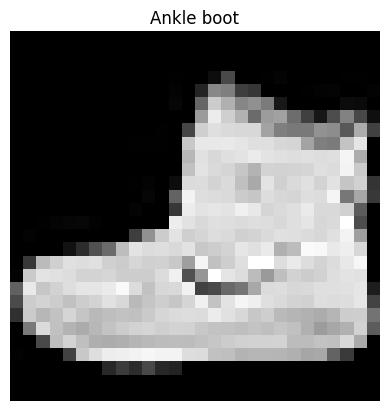

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

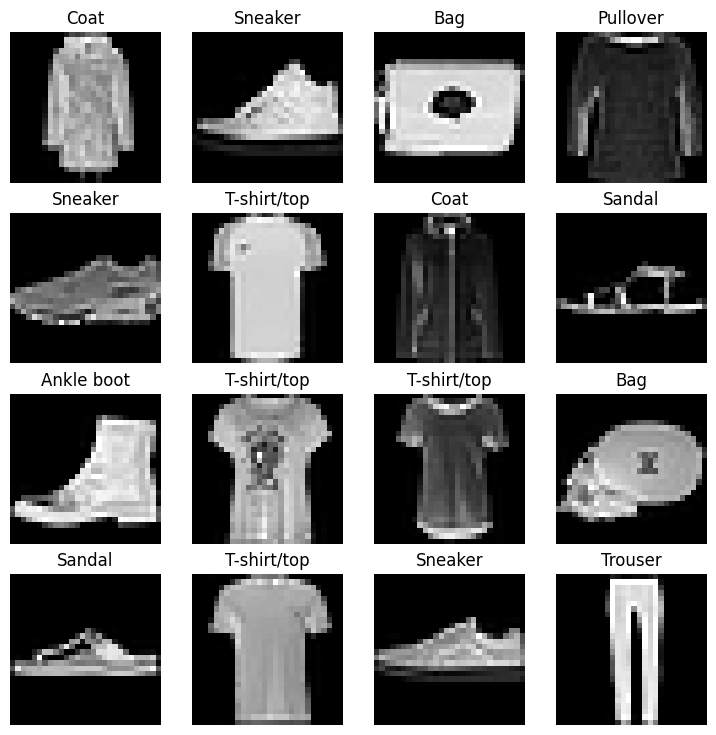

In [10]:
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
  img, label = train_dataset[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

In [11]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                batch_size=32,
                                                shuffle=True)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
                                               batch_size=32,
                                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e5680c3eb30>,
 <torch.utils.data.dataloader.DataLoader at 0x7e5680c3eb60>)

In [12]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [13]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

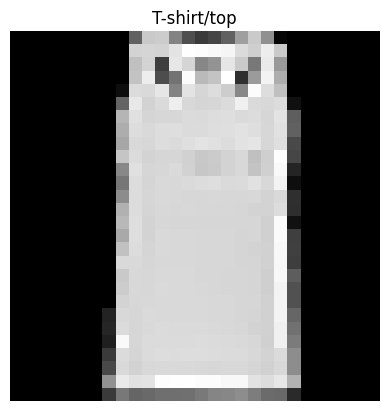

In [14]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0: Build a basline model

In [15]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
output.shape, x.shape

(torch.Size([1, 784]), torch.Size([1, 28, 28]))

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[ 0.3425,  0.2021,  0.2015,  0.2014, -0.2259, -0.2910, -0.5085,  0.4231,
          0.2140, -0.4571]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [19]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0357, -0.0196,  0.0196,  ..., -0.0064, -0.0283, -0.0274],
                      [-0.0242,  0.0252, -0.0252,  ..., -0.0150,  0.0171,  0.0051],
                      [-0.0162, -0.0347, -0.0350,  ...,  0.0245,  0.0115, -0.0343],
                      ...,
                      [ 0.0325, -0.0266, -0.0123,  ...,  0.0262,  0.0237,  0.0015],
                      [ 0.0119,  0.0269, -0.0287,  ...,  0.0316,  0.0014,  0.0170],
                      [ 0.0257, -0.0255,  0.0018,  ...,  0.0132, -0.0110,  0.0212]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0277, -0.0341,  0.0235, -0.0032,  0.0262,  0.0316,  0.0071,  0.0355,
                      -0.0279,  0.0083], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[-0.1443,  0.1050, -0.1501, -0.2580, -0.1747,  0.1534,  0.1444,  0.2961,
                       -0.1908, -0.2674],
                      [-0

### 3.1 Setup loss, optimizer and evaluation metrics

In [21]:
!wget https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/pytorch/helper_functions.py

--2024-05-23 12:36:08--  https://raw.githubusercontent.com/yacin-hamdi/deep_learning/master/pytorch/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2024-05-23 12:36:08 (79.2 MB/s) - ‘helper_functions.py’ saved [10160/10160]



In [22]:
from helper_functions import accuracy_fn

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.001)

### 3.2 Creating a function to time our experiments

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [25]:
start_time = timer()

end_time = timer()
print_train_time(start_time, end_time, "cpu")

Train time on cpu: 0.000 seconds


8.08839999990596e-05